In [1]:
#library loadings
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
white_wines = pd.read_csv('winequality-white.csv' , sep=';')

In [3]:
print(white_wines.shape)
white_wines.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white_wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


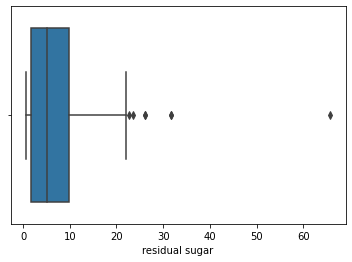

In [6]:
sns.boxplot(white_wines['residual sugar'])

In [7]:
z = np.abs(stats.zscore(white_wines))
white_wines = white_wines[(z < 3).all(axis=1)]
white_wines.shape

(4487, 12)

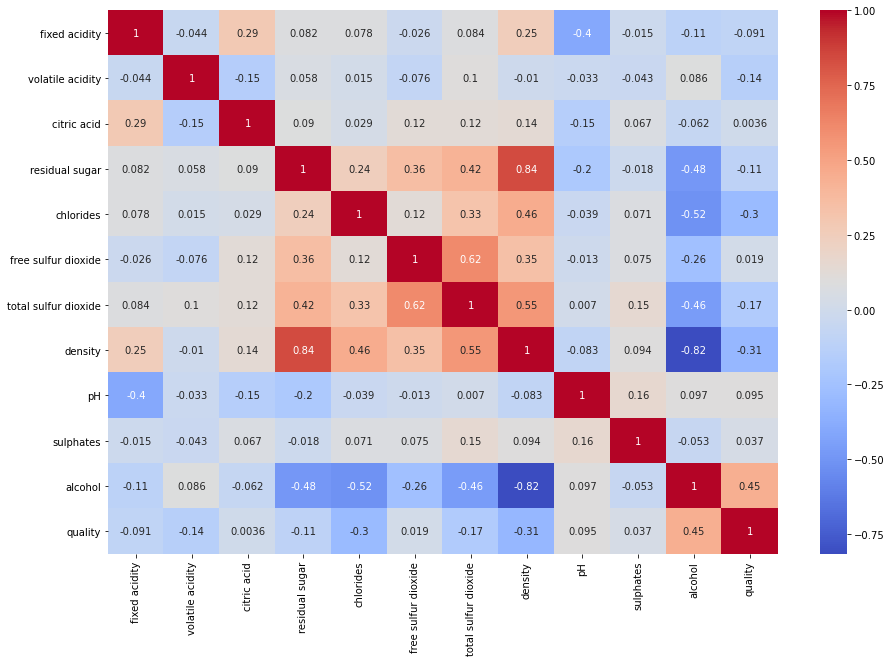

In [8]:
plt.subplots(figsize=(15, 10))
sns.heatmap(white_wines.corr(), annot = True, cmap = 'coolwarm')

In [9]:
white_wines['quality'].value_counts()

6    2038
5    1309
7     855
8     161
4     124
Name: quality, dtype: int64

In [10]:
# Define features X
X = np.asarray(white_wines.iloc[:,:-1]) 
# Define target y
y = np.asarray(white_wines['quality'])

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (3589, 11) (3589,)
Test set: (898, 11) (898,)


# KNN

In [13]:
# Train the model and predict for k=19
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 

# classification report for test set
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'accuracy',cv=10)

print('cross validation score',accuracy.mean())

# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, X, y, scoring = 'roc_auc_ovr',cv=10)

print('cross validation score with roc_auc',accuracy.mean())# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,knn.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        27
           5      0.575     0.541     0.557       270
           6      0.562     0.715     0.630       411
           7      0.554     0.401     0.465       167
           8      1.000     0.000     0.000        23

    accuracy                          0.565       898
   macro avg      0.738     0.331     0.330       898
weighted avg      0.589     0.565     0.542       898

cross validation score 0.5208508988227808
cross validation score with roc_auc 0.7089859400420266
roc_auc_score 0.790981463828026


# Logistic Regression

In [14]:
# import module
from sklearn.linear_model import LogisticRegression

# Train and fit model
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(X_train, y_train)

# Predict out-of-sample test set
y_pred = logreg.predict(X_test)

# classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))
print('accuracy',accuracy_score(y_test, y_pred))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(logreg, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,logreg.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        27
           5      0.580     0.470     0.519       270
           6      0.513     0.745     0.608       411
           7      0.458     0.228     0.304       167
           8      1.000     0.000     0.000        23

    accuracy                          0.524       898
   macro avg      0.710     0.288     0.286       898
weighted avg      0.550     0.524     0.491       898

accuracy 0.5244988864142539
cross validation score with roc_auc 0.742497984671654
roc_auc_score 0.7538056699952047


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Add polynomial features to the logistic regression model
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LogisticRegression(multi_class='multinomial',solver ='newton-cg', **kwargs))

In [16]:
# Train and fit the 3rd degree polynomial regression model
poly = PolynomialRegression(3)
poly.fit(X_train,y_train)
# Test out-of-sample test set
y_pred = poly.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred, digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(poly, X, y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,poly.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.348     0.296     0.320        27
           5      0.615     0.515     0.560       270
           6      0.571     0.669     0.616       411
           7      0.496     0.401     0.444       167
           8      0.344     0.478     0.400        23

    accuracy                          0.557       898
   macro avg      0.475     0.472     0.468       898
weighted avg      0.558     0.557     0.553       898

cross validation score with roc_auc_ovr scoring 0.6923965735919768
roc_auc_score 0.7925163332419187


# Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier
# Train and fit the Decision Tree Classification model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
# Evaluate the model with out-of-sample test set
y_pred = tree.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,tree.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.429     0.333     0.375        27
           5      0.662     0.589     0.624       270
           6      0.659     0.672     0.665       411
           7      0.570     0.611     0.590       167
           8      0.308     0.522     0.387        23

    accuracy                          0.621       898
   macro avg      0.525     0.545     0.528       898
weighted avg      0.627     0.621     0.623       898

cross validation score with roc_auc_ovr scoring 0.5678725235747779
roc_auc_score 0.7153687686161947


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, y_train)
# Test out-of-sample test set
y_pred = forest.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.714     0.185     0.294        27
           5      0.742     0.670     0.704       270
           6      0.662     0.815     0.731       411
           7      0.679     0.533     0.597       167
           8      1.000     0.435     0.606        23

    accuracy                          0.690       898
   macro avg      0.760     0.528     0.586       898
weighted avg      0.699     0.690     0.682       898

cross validation score with roc_auc_ovr scoring 0.7565877389842213
roc_auc_score 0.8903611822230715


# Adding SMOTE algorithm

In [19]:
# Import SMOTE module
from imblearn.over_sampling import SMOTE
# Create model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
# Create random forest model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
# Fit the model to the new train set
forest.fit(X_train_res, y_train_res.ravel())
# Test out-of-sample test set
y_pred = forest.predict(X_test)
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(y_test,forest.predict_proba(X_test), multi_class='ovr'))

              precision    recall  f1-score   support

           4      0.462     0.444     0.453        27
           5      0.718     0.696     0.707       270
           6      0.702     0.701     0.702       411
           7      0.618     0.611     0.614       167
           8      0.400     0.609     0.483        23

    accuracy                          0.673       898
   macro avg      0.580     0.612     0.592       898
weighted avg      0.676     0.673     0.674       898

cross validation score with roc_auc_ovr scoring 0.7565877389842213
roc_auc_score 0.8969515816275242


In [20]:
import pickle

pickle.dump(forest, open('model_white_wine.pkl', 'wb'))